In [57]:
k_data = "/kaggle/input/adp-realdataset/" #kaggle
l_data = "./data/"
data = l_data

import numpy as np
import pandas as pd
import scipy.stats as sts
import sklearn as sk 

In [1]:
import pandas as pd


df = pd.read_csv("youtube.csv",index_col=0)

# df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'youtube.csv'

Ïù∏Í∏∞ÎèôÏòÅÏÉÅ Ï†úÏûëÌöüÏàòÍ∞Ä ÎßéÏùÄ Ï±ÑÎÑê ÏÉÅÏúÑ 10Í∞úÎ™ÖÏùÑ Ï∂úÎ†•ÌïòÎùº (ÎÇ†ÏßúÍ∏∞Ï§Ä, Ï§ëÎ≥µÌè¨Ìï®)

ÎÖºÎûÄÏúºÎ°ú Ïù∏Í∏∞ÎèôÏòÅÏÉÅÏù¥ Îêú ÏºÄÏù¥Ïä§Î•º ÌôïÏù∏ÌïòÍ≥† Ïã∂Îã§. dislikesÏàòÍ∞Ä like ÏàòÎ≥¥Îã§ ÎÜíÏùÄ ÎèôÏòÅÏÉÅÏùÑ Ï†úÏûëÌïú Ï±ÑÎÑêÏùÑ Î™®Îëê Ï∂úÎ†•ÌïòÎùº

In [2]:
%%time
# df.info()
sf = df[df["dislikes"] > df["likes"]]
channel = sf.channelTitle.unique()
channel = pd.Series(channel)
print(channel)

0                          Ìï´ÎèÑÍ∑∏TV
1                      ASMR Ïï†Ï†ïTV
2                  ÌïòÏñÄÌä∏Î¶¨HayanTree
3                    ÏñëÌå° YangPang
4                 Ï≤†Íµ¨Ìòï (CHULTUBE)
5                         ÏôúÎÉêÎß®ÌïòÏö∞Ïä§
6                 (MUTUBE)ÏôÄÍæ∏ÎåÄÏû•Î¥âÏ§Ä
7                          Ïò§Î©îÌÇ¥TV
8                            Ïú°ÏßÄÎã¥
9                  MapleStory_KR
10    ROAD FIGHTING CHAMPIONSHIP
11                       ÏÇ¨ÎÇòÏù¥ ÍπÄÍ∏∞Ìõà
12                  ÎÇòÌòºÏûêÏÇ∞Îã§ STUDIO
13                 Gen.G esports
dtype: object
Wall time: 9.5 ms


Ï±ÑÎÑêÎ™ÖÏùÑ Î∞îÍæº ÏºÄÏù¥Ïä§Í∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÍ≥† Ïã∂Îã§. channelIdÏùò Í≤ΩÏö∞ Í≥†Ïú†Í∞íÏù¥ÎØÄÎ°ú Ïù¥Î•º ÌÜµÌï¥ Ï±ÑÎÑêÎ™ÖÏùÑ ÌïúÎ≤àÏù¥ÎùºÎèÑ Î∞îÍæº Ï±ÑÎÑêÏùò Í∞ØÏàòÎ•º Íµ¨ÌïòÏó¨Îùº

In [94]:
import time
st = time.time()
channels = df["channelId"].unique()
print(len(df), len(titles))
changes = []
## ÏïÑÎûòÏôÄ Í∞ôÏù¥ ÌïòÎ©¥ ÎÑàÎ¨¥ ÎäêÎ¶º.. 

60399 1832


In [97]:
%%time
st = time.time()
for id in channels:
    sf = df[df["channelId"] == id]
    sf_unique = sf["channelTitle"].unique()
#     print(id, sf_unique)
    if len(sf_unique) > 1:
#         print(id,"->",sf_unique)
        changes.append(id)
    
print(len(changes))
ed = time.time()
print(ed-st,"Ï¥à ÏßÄÎÇ®")

213
7.4057698249816895 Ï¥à ÏßÄÎÇ®
Wall time: 7.41 s


In [98]:
dd = df[['channelTitle','channelId']].drop_duplicates()
# print(dd.head())

change = df[['channelTitle','channelId']].drop_duplicates().channelTitle.value_counts()
# print(len(change),change)
target = change[change>1]
# print(target)
print(len(target), time.time() - ed)
# print(df[df["channelId"] == "UCtQYhzJWFai1y30UIA3uwYQ" ][["channelTitle","channelId"]])


2 79393.57095265388


In [104]:
%%time
df.info()
df["trending_date2"] = pd.to_datetime(df["trending_date2"])

<class 'pandas.core.frame.DataFrame'>
Index: 60399 entries, [Ïã†Î≥ë] Î¨ºÏûêÏ∞ΩÍ≥† to ENHYPEN (ÏóîÌïòÏù¥Ìîà) 'Tamed-Dashed' Official MV
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   channelTitle    60399 non-null  object        
 1   categoryId      60399 non-null  int64         
 2   view_count      60399 non-null  int64         
 3   likes           60399 non-null  int64         
 4   dislikes        60399 non-null  int64         
 5   comment_count   60399 non-null  int64         
 6   channelId       60399 non-null  object        
 7   trending_date2  60399 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 4.1+ MB
Wall time: 22.7 ms


In [347]:
# ÏùºÏöîÏùºÏóê Ïù∏Í∏∞ ÏûàÏóàÎçò ÏòÅÏÉÅÎ¨º Ï§ë Í∞ÄÏû• ÏûàÍ∏∞ ÏûáÏóàÎçò categoryID Îäî 
sf = df[df["trending_date2"].dt.weekday == 6]

s = sf["categoryId"].value_counts()
print(s.head(1))
# df["month"] = df["trending_date2"].dt.month_name()
# df["weekday"] = df["trending_date2"].dt.weekday
# df["quarter"] = df["trending_date2"].dt.quarter
# df["day"] = df["trending_date2"].dt.week

# print(df.groupby("day")["likes"].sum())

# like = sf.sort_values("likes", ascending=False).head(1)
# print("channelid ->",like["categoryId"],"likes ->",like["likes"])
# print(like)

df["dow"] = df["trending_date2"].dt.day_name().str.lower().str[:3]

import datetime

_dt = datetime.datetime(2024,5,1, 0,0,0)
print(_dt.weekday, _dt.weekday == 2)



24    3096
Name: categoryId, dtype: int64
<built-in method weekday of datetime.datetime object at 0x000001AE2343F660> False


In [360]:
df['trending_date2'] = pd.to_datetime(df['trending_date2'])
answer =df.loc[df['trending_date2'].dt.day_name() =='Sunday'].categoryId
print(answer.shape)

(8600,)


In [398]:
# ss = df.groupby([df['trending_date2'].dt.day_name(),'categoryId'],as_index=False)
print(ss.size())
group = df.groupby([df['trending_date2'].dt.day_name(),'categoryId'],as_index=False).size()
# print(type(group), group.info())
answer= group.pivot(index='categoryId',columns='trending_date2', values='size')
print(answer)
# display(answer)
# df["trending_date2"]

    trending_date2  categoryId  size
0           Friday           1   243
1           Friday           2   120
2           Friday          10   833
3           Friday          15   187
4           Friday          17   633
5           Friday          19    90
6           Friday          20   283
7           Friday          22  1288
8           Friday          23   568
9           Friday          24  2976
10          Friday          25   444
11          Friday          26   369
12          Friday          27   183
13          Friday          28   171
14          Friday          29    12
15          Monday           1   263
16          Monday           2   105
17          Monday          10   837
18          Monday          15   215
19          Monday          17   668
20          Monday          19    92
21          Monday          20   298
22          Monday          22  1373
23          Monday          23   594
24          Monday          24  3148
25          Monday          25   453
2

In [280]:
sampls = np.random.randint(0,10,1000)

s = pd.Series(sampls).value_counts()
s_df = pd.DataFrame(s)
s_df["test"] = 0
s_df.rename(columns = {0:"num"})
s_df

0  test
5  112     0
4  110     0
0  110     0
9  104     0
2   96     0
1   96     0
3   94     0
8   93     0
6   93     0
7   92     0


### 5
Í∞Å ÏöîÏùºÎ≥Ñ Ïù∏Í∏∞ ÏòÅÏÉÅÎì§Ïùò categoryIdÎäî Í∞ÅÍ∞Å Î™áÍ∞ú Ïî©Ïù∏ÏßÄ ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏúºÎ°ú ÌëúÌòÑÌïòÎùº


In [384]:
pd.options.display.max_rows = None
# sss = df.groupby("weekday").categoryId()
sdf = pd.crosstab(df["categoryId"],df["dow"])
sss = pd.pivot_table(df,index="categoryId",columns = "dow")

ValueError: Grouper for 'dow' not 1-dimensional

In [382]:
type(sdf), type(sss)
sdf.index, sss.index
# print(sss)


(Int64Index([1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29], dtype='int64', name='categoryId'),
 Int64Index([1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29], dtype='int64', name='categoryId'))

In [378]:
df["dow"] = df["trending_date2"].dt.day_name().str.lower().str[:3]
# df["dow"] = df["dow"].str[:3]
df.info()
# df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 60399 entries, [Ïã†Î≥ë] Î¨ºÏûêÏ∞ΩÍ≥† to ENHYPEN (ÏóîÌïòÏù¥Ìîà) 'Tamed-Dashed' Official MV
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   channelTitle    60399 non-null  object        
 1   categoryId      60399 non-null  int64         
 2   view_count      60399 non-null  int64         
 3   likes           60399 non-null  int64         
 4   dislikes        60399 non-null  int64         
 5   comment_count   60399 non-null  int64         
 6   channelId       60399 non-null  object        
 7   trending_date2  60399 non-null  datetime64[ns]
 8   month           60399 non-null  object        
 9   weekday         60399 non-null  int64         
 10  quarter         60399 non-null  int64         
 11  day             60399 non-null  int64         
 12  dow             60399 non-null  object        
dtypes: datetime64[ns](1), int64(8), object(4)
memor

ÎåìÍ∏ÄÏùò ÏàòÎ°ú (comment_count) ÏòÅÏÉÅ Î∞òÏùëÏóê ÎåÄÌïú ÌåêÎã®ÏùÑ Ìï† Ïàò ÏûàÎã§. viewcountÎåÄÎπÑ ÎåìÍ∏ÄÏàòÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ ÏòÅÏÉÅÏùÑ ÌôïÏù∏ÌïòÎùº (view_countÍ∞íÏù¥ 0Ïù∏ Í≤ΩÏö∞Îäî Ï†úÏô∏ÌïúÎã§)

In [443]:
%%time
# df.info()
dels = df[df["view_count"] == 0]
# print(dels["view_count"])
sf = df.drop(index=dels.index , axis = 0)
# print(len(sf))
sf["ratio"] =  sf["comment_count"] / sf["view_count"]
cvf = sf[sf["ratio"] == sf["ratio"].max()]
cvf[["view_count","comment_count","ratio"]].head()

Wall time: 25.9 ms


c:\programming\venv_307\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


view_count  comment_count     ratio
title                                                                    
60Î∂Ñ ÎèôÏïà ÎåìÍ∏ÄÏù¥ Îã¨Î¶¨ÏßÄ ÏïäÏúºÎ©¥, ÏòÅÏÉÅÏù¥ ÏÇ≠Ï†úÎê©ÎãàÎã§. (Ï±åÎ¶∞ÏßÄ)     1214527         196166  0.161516

In [444]:
%%time
# df.info()
sf = df[df["view_count"] != 0]
# print(dels["view_count"])
# sf = df.drop(index=dels.index , axis = 0)
# print(len(sf))
sf["ratio"] =  sf["comment_count"] / sf["view_count"]
cvf = sf[sf["ratio"] == sf["ratio"].max()]
cvf[["view_count","comment_count","ratio"]].head()

Wall time: 26.3 ms


c:\programming\venv_307\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


view_count  comment_count     ratio
title                                                                    
60Î∂Ñ ÎèôÏïà ÎåìÍ∏ÄÏù¥ Îã¨Î¶¨ÏßÄ ÏïäÏúºÎ©¥, ÏòÅÏÉÅÏù¥ ÏÇ≠Ï†úÎê©ÎãàÎã§. (Ï±åÎ¶∞ÏßÄ)     1214527         196166  0.161516

like ÎåÄÎπÑ dislikeÏùò ÏàòÍ∞Ä Í∞ÄÏû• Ï†ÅÏùÄ ÏòÅÏÉÅÏùÄ Î¨¥ÏóáÏù∏Í∞Ä? (like, dislike Í∞íÏù¥ 0Ïù∏Í≤ΩÏö∞Îäî Ï†úÏô∏ÌïúÎã§)

In [479]:
df.info()
df_ld = df[ (df["likes"] != 0) & (df["dislikes"] != 0)]
df_ld.dropna(inplace=True)
df_ld["ratio_ld"] = df_ld["dislikes"] / df_ld["likes"]
_min = df_ld["ratio_ld"].min()
s = df_ld[df_ld["ratio_ld"] == _min]
print(s.index)


<class 'pandas.core.frame.DataFrame'>
Index: 60399 entries, [Ïã†Î≥ë] Î¨ºÏûêÏ∞ΩÍ≥† to ENHYPEN (ÏóîÌïòÏù¥Ìîà) 'Tamed-Dashed' Official MV
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   channelTitle    60399 non-null  object        
 1   categoryId      60399 non-null  int64         
 2   view_count      60399 non-null  int64         
 3   likes           60399 non-null  int64         
 4   dislikes        60399 non-null  int64         
 5   comment_count   60399 non-null  int64         
 6   channelId       60399 non-null  object        
 7   trending_date2  60399 non-null  datetime64[ns]
 8   month           60399 non-null  object        
 9   weekday         60399 non-null  int64         
 10  quarter         60399 non-null  int64         
 11  day             60399 non-null  int64         
 12  dow             60399 non-null  object        
 13  cvf             60392 non-null  float64       


c:\programming\venv_307\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\programming\venv_307\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Î¨∏Ï†ú 9
Í∞ÄÏû•ÎßéÏùÄ Ìä∏Î†åÎìú ÏòÅÏÉÅÏùÑ Ï†úÏûëÌïú Ï±ÑÎÑêÏùò Ïù¥Î¶ÑÏùÄ Î¨¥ÏóáÏù∏Í∞Ä? (ÎÇ†ÏßúÍ∏∞Ï§Ä, Ï§ëÎ≥µÌè¨Ìï®)

In [511]:
%%time

ss = df["channelTitle"].value_counts().sort_values(ascending=False)


index = df["channelTitle"].value_counts().sort_values(ascending=False).index[0]


KeyError: './channelTitle'

In [192]:
import pandas as pd


channel =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/channelInfo.csv')
video =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/youtube/videoInfo.csv')

# display(channel.head())
# display(video.head())

channel.to_csv(path_or_buf="channel.csv")
video.to_csv("video.csv")


In [45]:
channel = pd.read_csv("channel.csv")
i = channel.info()
channel["ct"] = pd.to_datetime(channel["ct"])
channel.info()
channel.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1395 non-null   int64 
 1   channelid    1395 non-null   object
 2   subcnt       1395 non-null   int64 
 3   viewcnt      1395 non-null   int64 
 4   videocnt     1395 non-null   int64 
 5   ct           1395 non-null   object
 6   channelname  1395 non-null   object
dtypes: int64(4), object(3)
memory usage: 76.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   1395 non-null   int64         
 1   channelid    1395 non-null   object        
 2   subcnt       1395 non-null   int64         
 3   viewcnt      1395 non-null   int64         
 4   videocnt     1395 non-null   int64         
 5   ct           1395 no

Unnamed: 0                 channelid   subcnt    viewcnt  videocnt  \
0           0  UCkQCwnkQfgSuPTTnw_Y7v7w  1310000  410238653       736   
1           1  UCkQCwnkQfgSuPTTnw_Y7v7w  1310000  412531322       736   
2           2  UCkQCwnkQfgSuPTTnw_Y7v7w  1310000  412531322       735   
3           3  UCkQCwnkQfgSuPTTnw_Y7v7w  1310000  412531322       737   
4           4  UCkQCwnkQfgSuPTTnw_Y7v7w  1320000  412531322       737   

                   ct channelname  
0 2021-09-30 03:01:03         ÍΩàÎöúÎ£π  
1 2021-09-30 09:01:03         ÍΩàÎöúÎ£π  
2 2021-09-30 15:01:03         ÍΩàÎöúÎ£π  
3 2021-09-30 21:01:03         ÍΩàÎöúÎ£π  
4 2021-10-01 03:01:04         ÍΩàÎöúÎ£π

Channel Îç∞Ïù¥ÌÑ∞Ï§ë 2021-10-03Ïùº Ïù¥ÌõÑ Í∞Å Ï±ÑÎÑêÏùò Ï≤òÏùå Í∏∞Î°ù ÎêêÎçò Íµ¨ÎèÖÏûê Ïàò(subcnt)Î•º Ï∂úÎ†•ÌïòÎùº

In [53]:
df = channel[ channel["ct"] >= '2021-10-03']
df = df[["channelname","ct","subcnt"]]
names = df["channelname"].unique()
ll = []
for i in names:
    sf = df[df["channelname"] == i]
    sf = sf.sort_values(["ct"])
#     print(sf.head(1))
    subcnt = sf.head(1)["subcnt"]
#     print("sub", subcnt)
    print(type(subcnt), subcnt.index, subcnt.values)
    ll.append({i:subcnt.values})    

print(ll)

<class 'pandas.core.series.Series'> Int64Index([12], dtype='int64') [1330000]
<class 'pandas.core.series.Series'> Int64Index([139], dtype='int64') [257000]
<class 'pandas.core.series.Series'> Int64Index([266], dtype='int64') [322000]
<class 'pandas.core.series.Series'> Int64Index([393], dtype='int64') [922000]
<class 'pandas.core.series.Series'> Int64Index([520], dtype='int64') [55000]
<class 'pandas.core.series.Series'> Int64Index([647], dtype='int64') [215000]
<class 'pandas.core.series.Series'> Int64Index([774], dtype='int64') [14900]
<class 'pandas.core.series.Series'> Int64Index([901], dtype='int64') [7520]
<class 'pandas.core.series.Series'> Int64Index([1028], dtype='int64') [10100]
<class 'pandas.core.series.Series'> Int64Index([1155], dtype='int64') [471000]
<class 'pandas.core.series.Series'> Int64Index([1276], dtype='int64') [54300]
[{'ÍΩàÎöúÎ£π': array([1330000], dtype=int64)}, {'ÏïºÏ†ÑÏÇΩÏß±Ïû¨': array([257000], dtype=int64)}, {'Ï∏ÑÏ†ïChuJeong': array([322000], dtype=int64)

In [59]:
channel.ct = pd.to_datetime(channel.ct)

t1 =channel[channel.ct >= pd.to_datetime('2021-10-03')].sort_values(['channelname','ct']).drop_duplicates('channelname')
a1 = t1[['channelname','subcnt']].reset_index(drop=True)
print(a1)
target = channel[channel.ct >= pd.to_datetime('2021-10-03')].sort_values(['ct','channelname']).drop_duplicates('channelname')
answer = target[['channelname','subcnt']].reset_index(drop=True)
print(answer)

        channelname   subcnt
0     Balming Tiger    54300
1     Í≥ΩÌÜ†Î¶¨ kwak tori   471000
2        ÍπÄÎÜçÎ∞ÄÏùò ÎÜçÎ∞ÄÌïú ÏÇ∂     7520
3               ÍΩàÎöúÎ£π  1330000
4            ÎÖºÎ¶¨Ïôï Ï†ÑÍ∏∞   922000
5       Î¶¥ÌéÑ Lilpearl    10100
6             ÏïºÏ†ÑÏÇΩÏß±Ïû¨   257000
7   ÏôÄÍ∏ÄÏôÄÍ∏Ä WagleWagle    55000
8               Ï°∞ÎÇòÎã®   215000
9        Ï∏ÑÏ†ïChuJeong   322000
10          ÌòïÏÇ¨!ÌÉêÏ†ïÎêòÎã§    14900
        channelname   subcnt
0            ÎÖºÎ¶¨Ïôï Ï†ÑÍ∏∞   922000
1             ÏïºÏ†ÑÏÇΩÏß±Ïû¨   257000
2        Ï∏ÑÏ†ïChuJeong   322000
3        ÍπÄÎÜçÎ∞ÄÏùò ÎÜçÎ∞ÄÌïú ÏÇ∂     7520
4       Î¶¥ÌéÑ Lilpearl    10100
5   ÏôÄÍ∏ÄÏôÄÍ∏Ä WagleWagle    55000
6               Ï°∞ÎÇòÎã®   215000
7           ÌòïÏÇ¨!ÌÉêÏ†ïÎêòÎã§    14900
8     Balming Tiger    54300
9     Í≥ΩÌÜ†Î¶¨ kwak tori   471000
10              ÍΩàÎöúÎ£π  1330000


### 11 Í∞ÅÏ±ÑÎÑêÏùò 2021-10-03 03:00:00 ~ 2021-11-01 15:00:00 ÍπåÏßÄ Íµ¨ÎèÖÏûêÏàò (subcnt) Ïùò Ï¶ùÍ∞ÄÎüâÏùÑ Íµ¨ÌïòÏó¨Îùº

In [140]:
t1 =channel[(channel.ct >= pd.to_datetime('2021-10-03 03:00:00')) &  (channel.ct <= pd.to_datetime('2021-11-01 15:00:00'))]
# t1 = t1[["channelname","ct"]]
# begin = t1.sort_values(["channelname","ct"])
# print(begin)
begin = t1.sort_values(["channelname","ct"]).drop_duplicates("channelname")

begin = begin[["channelname","subcnt"]]
begin.reset_index(drop=True, inplace=True)
end = t1.sort_values(["channelname","ct"]).drop_duplicates("channelname",keep='last')
end = end[["channelname","subcnt"]]
end.reset_index(drop=True, inplace=True)

# tt = pd.merge(begin,end)
# tt['del'] = tt['end_sub'] - tt['start_sub']

begin["last"] = end["subcnt"]
begin["rate"] = round((begin["last"] - begin["subcnt"]),3)
print(begin[["channelname","rate"]])
begin.loc[:,["channelname","rate"]]


        channelname   rate
0     Balming Tiger   2500
1     Í≥ΩÌÜ†Î¶¨ kwak tori  -2000
2        ÍπÄÎÜçÎ∞ÄÏùò ÎÜçÎ∞ÄÌïú ÏÇ∂   1540
3               ÍΩàÎöúÎ£π  70000
4            ÎÖºÎ¶¨Ïôï Ï†ÑÍ∏∞ -11000
5       Î¶¥ÌéÑ Lilpearl  11000
6             ÏïºÏ†ÑÏÇΩÏß±Ïû¨  11000
7   ÏôÄÍ∏ÄÏôÄÍ∏Ä WagleWagle      0
8               Ï°∞ÎÇòÎã®  12000
9        Ï∏ÑÏ†ïChuJeong   1000
10          ÌòïÏÇ¨!ÌÉêÏ†ïÎêòÎã§  10300


channelname   rate
0     Balming Tiger   2500
1     Í≥ΩÌÜ†Î¶¨ kwak tori  -2000
2        ÍπÄÎÜçÎ∞ÄÏùò ÎÜçÎ∞ÄÌïú ÏÇ∂   1540
3               ÍΩàÎöúÎ£π  70000
4            ÎÖºÎ¶¨Ïôï Ï†ÑÍ∏∞ -11000
5       Î¶¥ÌéÑ Lilpearl  11000
6             ÏïºÏ†ÑÏÇΩÏß±Ïû¨  11000
7   ÏôÄÍ∏ÄÏôÄÍ∏Ä WagleWagle      0
8               Ï°∞ÎÇòÎã®  12000
9        Ï∏ÑÏ†ïChuJeong   1000
10          ÌòïÏÇ¨!ÌÉêÏ†ïÎêòÎã§  10300

In [141]:
end = channel.loc[channel.ct.dt.strftime('%Y-%m-%d %H') =='2021-11-01 15']
start = channel.loc[channel.ct.dt.strftime('%Y-%m-%d %H') =='2021-10-03 03']

end_df = end[['channelname','subcnt']].reset_index(drop=True)
start_df = start[['channelname','subcnt']].reset_index(drop=True)

end_df.columns = ['channelname','end_sub']
start_df.columns = ['channelname','start_sub']


tt = pd.merge(start_df,end_df)
tt['del'] = tt['end_sub'] - tt['start_sub']
result = tt[['channelname','del']]
display(result)

channelname    del
0               ÍΩàÎöúÎ£π  70000
1             ÏïºÏ†ÑÏÇΩÏß±Ïû¨  11000
2        Ï∏ÑÏ†ïChuJeong   1000
3            ÎÖºÎ¶¨Ïôï Ï†ÑÍ∏∞ -11000
4   ÏôÄÍ∏ÄÏôÄÍ∏Ä WagleWagle      0
5               Ï°∞ÎÇòÎã®  12000
6           ÌòïÏÇ¨!ÌÉêÏ†ïÎêòÎã§  10300
7        ÍπÄÎÜçÎ∞ÄÏùò ÎÜçÎ∞ÄÌïú ÏÇ∂   1540
8       Î¶¥ÌéÑ Lilpearl  11000
9     Í≥ΩÌÜ†Î¶¨ kwak tori  -2000
10    Balming Tiger   2500

### 12
Í∞Å ÎπÑÎîîÏò§Îäî 10Î∂Ñ Í∞ÑÍ≤©ÏúºÎ°ú Íµ¨ÎèÖÏûêÏàò, Ï¢ãÏïÑÏöî, Ïã´Ïñ¥ÏöîÏàò, ÎåìÍ∏ÄÏàòÍ∞Ä ÏàòÏßëÎêúÍ≤ÉÏúºÎ°ú ÏïåÎ†§Ï°åÎã§. Í≥µÎ≤î EP1Ïùò ÎπÑÎîîÏò§Ï†ïÎ≥¥ Îç∞Ïù¥ÌÑ∞Ï§ë ÏàòÏßëÍ∞ÑÍ≤©Ïù¥ 5Î∂Ñ Ïù¥Ìïò, 20Î∂ÑÏù¥ÏÉÅÏù∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Í∞Ñ( Ìï¥Îãπ ÏãúÏ†ê Ï†Ñ,ÌõÑ) Ïùò ÏãúÍ∞ÅÏùÑ Î™®Îëê Ï∂úÎ†•ÌïòÎùº

In [9]:
video = pd.read_csv("video.csv")
# video = video.drop_duplicates()7777
# video = video.dropna()
video.reset_index(inplace=True)
video.ct = pd.to_datetime(video.ct)
dd =video.ct.diff(1)

from datetime import timedelta
tt =dd[(dd <= timedelta(minutes=5)) | (dd >= timedelta(minutes=20))].index
tt2 =[]

length = len(video)
print(length)
for n in tt:
    tt2.append(n-1)
    tt2.append(n)
    tt2.append(n+1)

s = pd.Series(index=tt2, data = tt2)
# print(s.index)
# tt = s.index
# print(video.loc[722,:])

print(video.loc[s.index,:])

# for i in video.iterrows():
#     print(i)

# for i in s.index:
#     try:
#         print(video.loc[i,:])
#     except Exception as e :
#         print(i,e)

15201
       index  Unnamed: 0      videopk  viewcnt  likecnt  dislikecnt  \
9          9           9  c5JQp6xafqc  1697079    30724         717   
10        10          10  c5JQp6xafqc     6396      680           3   
11        11          11  c5JQp6xafqc    13087     1113           7   
417      417         417  c5JQp6xafqc  1663790    30454         703   
418      418         418  c5JQp6xafqc  1700233    30747         716   
...      ...         ...          ...      ...      ...         ...   
14256  14256       14256  AxGKHmXyuAE  1473758    22863         315   
14257  14257       14257  AxGKHmXyuAE  1474396    22867         317   
14934  14934       14934  AxGKHmXyuAE  1750222    24494         389   
14935  14935       14935  yZt-h-KcmUE    82015     3338          78   
14936  14936       14936  yZt-h-KcmUE   112026     4256         224   

       favoritecnt  cmcnt                  ct videoname  
9                0   6621 2021-10-10 16:50:03    Í≥µÎ≤î EP1  
10               0   

In [17]:
import scipy.stats as st

x = st.randint.rvs(10,1000,size=100)
print(x)

[ 81 240  58 882 593 528  92 328 584 639 760 862 498 605 395 360  19 227
 294 954 675 670 800 561 324  78 304 691 149 510 623 753 428 817 112 495
 766 211 101 825 269 926 664 106 784 411 215 922 210 267 121 224 936  81
 456  63 202  42 200 562 676 125 979 761 905 150 936 320  11 650 236 831
 405 783 467 422 476 444 962  60 722 725 579 408 340 572 627 787 164 895
 977 697 444 124 540  14 413 787 196 627]


### 16 Í∞Å ÏóêÌîºÏÜåÎìúÏùò ÏãúÏûëÎÇ†Ïßú(ÎÖÑ-Ïõî-Ïùº)Î•º ÏóêÌîºÏÜåÎìú Ïù¥Î¶ÑÍ≥º Î¨∂Ïñ¥ Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏúºÎ°ú ÎßåÎì§Í≥† Ï∂úÎ†•ÌïòÎùº

In [35]:
%who
video["date"] = pd.to_datetime(video["ct"], format = "%Y%m%d")
video["date"] = video["date"].dt.strftime("%Y-%m-%d")
video["hh"] = video["date"] +"_"+ video["videoname"]
video["hh"]

channel	 dd	 df	 length	 n	 pd	 s	 sf	 st	 
timedelta	 tt	 tt2	 video	 x	 


0        2021-10-10_ Í≥µÎ≤î EP1
1        2021-10-10_ Í≥µÎ≤î EP1
2        2021-10-10_ Í≥µÎ≤î EP1
3        2021-10-10_ Í≥µÎ≤î EP1
4        2021-10-10_ Í≥µÎ≤î EP1
                ...        
15196    2021-11-01_ Í≥µÎ≤î EP8
15197    2021-11-01_ Í≥µÎ≤î EP8
15198    2021-11-01_ Í≥µÎ≤î EP8
15199    2021-11-01_ Í≥µÎ≤î EP8
15200    2021-11-01_ Í≥µÎ≤î EP8
Name: hh, Length: 15201, dtype: object

In [37]:
start_date = video.sort_values(['ct','videoname']).drop_duplicates('videoname')[['ct','videoname']]
start_date['date'] = start_date.ct.dt.date
answer = start_date[['date','videoname']]
display(answer)

date videoname
10     2021-10-07    Í≥µÎ≤î EP1
3496   2021-10-09    Í≥µÎ≤î EP2
6696   2021-10-14    Í≥µÎ≤î EP3
9264   2021-10-16    Í≥µÎ≤î EP4
11544  2021-10-21    Í≥µÎ≤î EP5
13661  2021-10-23    Í≥µÎ≤î EP6
13106  2021-10-28    Í≥µÎ≤î EP7
14935  2021-10-30    Í≥µÎ≤î EP8

### Î¨∏Ï†ú19
video Ï†ïÎ≥¥Ïùò Í∞ÄÏû• ÏµúÍ∑º Îç∞Ïù¥ÌÑ∞Îì§ÏóêÏÑú Í∞Å ÏóêÌîºÏÜåÎìúÏùò Ïã´Ïñ¥Ïöî/Ï¢ãÏïÑÏöî ÎπÑÏú®ÏùÑ ratio Ïª¨ÎüºÏúºÎ°ú ÎßåÎì§Í≥† videoname, ratioÎ°ú Íµ¨ÏÑ±Îêú Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ ratioÎ•º Ïò§Î¶ÑÏ∞®ÏàúÏúºÎ°ú Ï†ïÎ†¨ÌïòÎùº

In [43]:
video.info()
video["ratio"] = video["dislikecnt"] / video["likecnt"]
mydf = video[["videoname","ratio"]].sort_values(["ratio"])
mydf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15201 entries, 0 to 15200
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        15201 non-null  int64         
 1   Unnamed: 0   15201 non-null  int64         
 2   videopk      15201 non-null  object        
 3   viewcnt      15201 non-null  int64         
 4   likecnt      15201 non-null  int64         
 5   dislikecnt   15201 non-null  int64         
 6   favoritecnt  15201 non-null  int64         
 7   cmcnt        15201 non-null  int64         
 8   ct           15201 non-null  datetime64[ns]
 9   videoname    15201 non-null  object        
 10  date         15201 non-null  object        
 11  hh           15201 non-null  object        
 12  rate         15201 non-null  float64       
 13  ratio        15201 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(7), object(4)
memory usage: 1.6+ MB


videoname     ratio
10       Í≥µÎ≤î EP1  0.004412
3496     Í≥µÎ≤î EP2  0.004926
9264     Í≥µÎ≤î EP4  0.004946
9265     Í≥µÎ≤î EP4  0.005305
9266     Í≥µÎ≤î EP4  0.005834
...         ...       ...
15197    Í≥µÎ≤î EP8  0.141333
15199    Í≥µÎ≤î EP8  0.141334
15195    Í≥µÎ≤î EP8  0.141338
15200    Í≥µÎ≤î EP8  0.141357
15198    Í≥µÎ≤î EP8  0.141384

[15201 rows x 2 columns]

In [49]:
video = pd.read_csv("video.csv")
video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15201 entries, 0 to 15200
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   15201 non-null  int64 
 1   videopk      15201 non-null  object
 2   viewcnt      15201 non-null  int64 
 3   likecnt      15201 non-null  int64 
 4   dislikecnt   15201 non-null  int64 
 5   favoritecnt  15201 non-null  int64 
 6   cmcnt        15201 non-null  int64 
 7   ct           15201 non-null  object
 8   videoname    15201 non-null  object
dtypes: int64(6), object(3)
memory usage: 1.0+ MB


In [70]:
ll = set(video.index) -  set(video.drop_duplicates().index)
answer  = video[video.index.isin(set(video.index) -  set(video.drop_duplicates().index))]
## uniqure 
result = answer[['videoname','ct']]
# display(result)

video[video.index.isin([0,1,2])]

Unnamed: 0      videopk  viewcnt  likecnt  dislikecnt  favoritecnt  cmcnt  \
0           0  c5JQp6xafqc  1667010    30474         706            0   6587   
1           1  c5JQp6xafqc  1669089    30495         707            0   6589   
2           2  c5JQp6xafqc  1674759    30522         711            0   6596   

                    ct videoname  
0  2021-10-10 15:20:03    Í≥µÎ≤î EP1  
1  2021-10-10 15:30:03    Í≥µÎ≤î EP1  
2  2021-10-10 15:40:02    Í≥µÎ≤î EP1

In [204]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/worldcup/worldcupgoals.csv')

df.head()

Player  Goals                Years  Country
0  Miroslav Klose     16  2002-2006-2010-2014  Germany
1         Ronaldo     15       1998-2002-2006   Brazil
2     Gerd Muller     14            1970-1974  Germany
3   Just Fontaine     13                 1958   France
4            Pele     12  1958-1962-1966-1970   Brazil

In [158]:
# df.to_csv("worldcupgoals.csv")
# df = pd.read_csv("worldcupgoals.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Player   1295 non-null   object
 1   Goals    1295 non-null   int64 
 2   Years    1295 non-null   object
 3   Country  1295 non-null   object
dtypes: int64(1), object(3)
memory usage: 40.6+ KB


### 21
Ï£ºÏñ¥ÏßÑ Ï†ÑÏ≤¥ Í∏∞Í∞ÑÏùò Í∞Å ÎÇòÎùºÎ≥Ñ Í≥®ÎìùÏ†êÏàò ÏÉÅÏúÑ 5Í∞ú Íµ≠Í∞ÄÏôÄ Í∑∏ ÎìùÏ†êÏàòÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÌòïÌÉúÎ°ú Ï∂úÎ†•ÌïòÎùº

In [182]:
# df.sort_values(["Country","Goals"], ascending=False)
dd=df.groupby(by="Country").sum().sort_values("Goals",ascending=False).iloc[:5,:]
print(type(df.groupby(by="Country").sum()))
dd.index, dd.values


<class 'pandas.core.frame.DataFrame'>


(Index(['Brazil', 'Germany', 'Argentina', 'Italy', 'France'], dtype='object', name='Country'),
 array([[228],
        [226],
        [135],
        [123],
        [115]], dtype=int64))

### Question 22
Ï£ºÏñ¥ÏßÑ Ï†ÑÏ≤¥Í∏∞Í∞ÑÎèôÏïà Í≥®ÎìùÏ†êÏùÑ Ìïú ÏÑ†ÏàòÍ∞Ä Í∞ÄÏû• ÎßéÏùÄ ÎÇòÎùº ÏÉÅÏúÑ 5Í∞ú Íµ≠Í∞ÄÏôÄ ÏÑ†Ïàò Ïà´ÏûêÎ•º Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÌòïÏãùÏúºÎ°ú Ï∂úÎ†•ÌïòÎùº

In [241]:
# df.groupby(by="Country").sum().sort_values(["Goals"], ascending=False)
df.info()
# df.groupby("Country").sum().sort_values(["Goals"],ascending=False).head(5)
result = df.groupby('Country').size().sort_values(ascending=False).head(5)
# result = df.groupby(by='Country').size()
result2 = pd.value_counts(df["Country"]).head(5)
result == result2
result
print(type(result))

pd.options.display.max_rows = 10
print(df["Years"].unique())
# result.index, result.values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Player     1295 non-null   object
 1   Goals      1295 non-null   int64 
 2   Years      1295 non-null   object
 3   Country    1295 non-null   object
 4   Years_len  1295 non-null   int64 
 5   disp_nok   1295 non-null   bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 52.0+ KB
<class 'pandas.core.series.Series'>
['2002-2006-2010-2014' '1998-2002-2006' '1970-1974' '1958'
 '1958-1962-1966-1970' '1990-1994-1998' '1954' '1994-1998-2002'
 '1986-1990' '2010-2014' '1954-1958' '1970-1978-1982' '1974-1978-1982'
 '1950' '1966-1970-1974' '1958-1962' '1978-1982-1986' '1978-1982'
 '1998-2002' '1966' '2006-2010-2014' '1982-1986-1990-1994' '1930'
 '1934-1938' '1986-1990-1994' '1950-1954' '1954-1958-1962' '1974-1978'
 '2006-2010-2014-2018' '2010-2014-2018' '1994-1998' '2014-2018'
 '1970-1974-1978' '2014' 

### Question 23

Years Ïª¨ÎüºÏùÄ ÎÖÑÎèÑ -ÎÖÑÎèÑ ÌòïÏãùÏúºÎ°ú Íµ¨ÏÑ±ÎêòÏñ¥ÏûàÍ≥†, Í∞Å ÎÖÑÎèÑÎäî 4ÏûêÎ¶¨ Ïà´ÏûêÏù¥Îã§.
ÎÖÑÎèÑ ÌëúÍ∏∞Í∞Ä 4ÏûêÎ¶¨ Ïà´ÏûêÎ°ú ÏïàÎêú ÏºÄÏù¥Ïä§Í∞Ä Ï°¥Ïû¨ÌïúÎã§. Ìï¥Îãπ Í±¥ÏùÄ Î™áÍ±¥Ïù∏ÏßÄ Ï∂úÎ†•ÌïòÎùº

In [248]:
print(df["Years"].head())
# print(len("aa"))

def check(data):
    years = str.split(data,"-")
    for year in years :
        if len(year) != 4 :
            return True
    return False     

a = df[df["Years"].map(check)]
# a = df[ df["disp_nok"]]
print(len(a))
pd.options.display.max_rows = None


0    2002-2006-2010-2014
1         1998-2002-2006
2              1970-1974
3                   1958
4    1958-1962-1966-1970
Name: Years, dtype: object
45


### 24, 25
Q3ÏóêÏÑú Î∞úÏÉùÌïú ÏòàÏô∏ ÏºÄÏù¥Ïä§Î•º Ï†úÏô∏Ìïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ df2ÎùºÍ≥† Ï†ïÏùòÌïòÍ≥† Îç∞Ïù¥ÌÑ∞Ïùò ÌñâÏùò Ïà´ÏûêÎ•º Ï∂úÎ†•ÌïòÎùº 
(ÏïÑÎûò Î¨∏Ï†úÎ∂ÄÌÑ∞Îäî df2Î°ú ÌíÄÏù¥ÌïòÍ≤†ÏäµÎãàÎã§) 
### 26
2002ÎÖÑÎèÑÏóê Ï∂úÏ†ÑÌïú Ï†ÑÏ≤¥ ÏÑ†ÏàòÎäî Î™áÎ™ÖÏù∏Í∞Ä?

In [264]:
df["len_cup"] = (df["Years"].str.split("-"))
df["len_cup"] = df["len_cup"].map(lambda x : len(x))
df.loc[df.len_cup >= 4, :].shape[0]


16

## ÏÑúÏö∏Ïãú Îî∞Î¶âÏù¥ Ïù¥Ïö© Îç∞Ïù¥ÌÑ∞ 


In [3]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/bicycle/seoul_bi.csv')
df.head()
df.to_csv("seoul_by.csv", index = False)


In [20]:
import pandas as pd
# df = pd.read_csv("seoul_by.csv")
import os

# os.rename("seoul_by.csv", "seoul_bi.csv")
df = pd.read_csv("seoul_bi.csv")
df.shape

(678950, 11)

### Question 31

ÎåÄÏó¨ÏùºÏûêÎ≥Ñ Îç∞Ïù¥ÌÑ∞Ïùò ÏàòÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï∂úÎ†•ÌïòÍ≥†, Í∞ÄÏû• ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäî ÎÇ†ÏßúÎ•º Ï∂úÎ†•ÌïòÎùº

In [19]:
df.shape
df.info()
type(df.isna().sum())
df["ÎåÄÏó¨ÏùºÏûê"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678950 entries, 0 to 678949
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ÎåÄÏó¨ÏùºÏûê    678950 non-null  object 
 1   ÎåÄÏó¨ÏãúÍ∞Ñ    678950 non-null  int64  
 2   ÎåÄÏó¨ÏÜåÎ≤àÌò∏   678950 non-null  int64  
 3   ÎåÄÏó¨Íµ¨Î∂ÑÏΩîÎìú  678950 non-null  object 
 4   ÏÑ±Î≥Ñ      678950 non-null  object 
 5   Ïó∞Î†πÎåÄÏΩîÎìú   678950 non-null  object 
 6   Ïù¥Ïö©Í±¥Ïàò    678950 non-null  int64  
 7   Ïö¥ÎèôÎüâ     678950 non-null  object 
 8   ÌÉÑÏÜåÎüâ     678950 non-null  object 
 9   Ïù¥ÎèôÍ±∞Î¶¨    678950 non-null  float64
 10  ÏÇ¨Ïö©ÏãúÍ∞Ñ    678950 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 57.0+ MB


2021-06-04    56788
2021-06-02    56100
2021-06-08    55623
2021-06-14    54945
2021-06-09    54507
2021-06-05    52730
2021-06-07    52623
2021-06-11    52089
2021-06-12    48569
2021-06-01    48081
2021-06-06    47787
2021-06-13    43131
2021-06-10    36992
2021-06-03    18985
Name: ÎåÄÏó¨ÏùºÏûê, dtype: int64

### Question 32

Í∞Å ÏùºÏûêÏùò ÏöîÏùºÏùÑ ÌëúÍ∏∞ÌïòÍ≥† (‚ÄòMonday‚Äô ~‚ÄôSunday‚Äô) ‚Äòday_name‚ÄôÏª¨ÎüºÏùÑ Ï∂îÍ∞ÄÌïòÍ≥† Ïù¥Î•º Ïù¥Ïö©ÌïòÏó¨ Í∞Å ÏöîÏùºÎ≥Ñ Ïù¥Ïö© ÌöüÏàòÏùò Ï¥ùÌï©ÏùÑ Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏúºÎ°ú Ï∂úÎ†•ÌïòÎùº

In [33]:
df.head(1)
# df["ÎåÄÏó¨ÏùºÏûê1"] = pd.to_datetime(df["ÎåÄÏó¨ÏùºÏûê"])
df.head(1)
df["day_name"] = df["ÎåÄÏó¨ÏùºÏûê1"].dt.day_name()
df["day_name"].value_counts()

ÎåÄÏó¨ÏùºÏûê  ÎåÄÏó¨ÏãúÍ∞Ñ  ÎåÄÏó¨ÏÜåÎ≤àÌò∏ ÎåÄÏó¨Íµ¨Î∂ÑÏΩîÎìú ÏÑ±Î≥Ñ Ïó∞Î†πÎåÄÏΩîÎìú  Ïù¥Ïö©Í±¥Ïàò   Ïö¥ÎèôÎüâ   ÌÉÑÏÜåÎüâ  Ïù¥ÎèôÍ±∞Î¶¨  ÏÇ¨Ïö©ÏãúÍ∞Ñ  \
0  2021-06-01     0   3541    Ï†ïÍ∏∞Í∂å  F  ~10ÎåÄ     1  0.00  0.00   0.0     8   

       ÎåÄÏó¨ÏùºÏûê1 day_name  
0 2021-06-01  Tuesday

ÎåÄÏó¨ÏùºÏûê  ÎåÄÏó¨ÏãúÍ∞Ñ  ÎåÄÏó¨ÏÜåÎ≤àÌò∏ ÎåÄÏó¨Íµ¨Î∂ÑÏΩîÎìú ÏÑ±Î≥Ñ Ïó∞Î†πÎåÄÏΩîÎìú  Ïù¥Ïö©Í±¥Ïàò   Ïö¥ÎèôÎüâ   ÌÉÑÏÜåÎüâ  Ïù¥ÎèôÍ±∞Î¶¨  ÏÇ¨Ïö©ÏãúÍ∞Ñ  \
0  2021-06-01     0   3541    Ï†ïÍ∏∞Í∂å  F  ~10ÎåÄ     1  0.00  0.00   0.0     8   

       ÎåÄÏó¨ÏùºÏûê1 day_name  
0 2021-06-01  Tuesday

Wednesday    110607
Friday       108877
Monday       107568
Tuesday      103704
Saturday     101299
Sunday        90918
Thursday      55977
Name: day_name, dtype: int64

### Question 33
Í∞Å ÏöîÏùºÎ≥Ñ Í∞ÄÏû• ÎßéÏù¥ Ïù¥Ïö©Ìïú ÎåÄÏó¨ÏÜåÏùò Ïù¥Ïö©ÌöüÏàòÏôÄ ÎåÄÏó¨ÏÜå Î≤àÌò∏Î•º Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏúºÎ°ú Ï∂úÎ†•ÌïòÎùº


In [184]:
from pydantic_settings import BaseSettings
from pandas_profiling import ProfileReport


ProfileReport(df)

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.5/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.5/u/import-error

In [121]:
sf = df[["day_name", "ÎåÄÏó¨ÏÜåÎ≤àÌò∏","Ïù¥Ïö©Í±¥Ïàò"]]
# display(sf)
# result = df.groupby(['day_name','ÎåÄÏó¨ÏÜåÎ≤àÌò∏']).size()
# display(result)
# print(result.index, result.columns)
# # result.head()
s = sf.groupby(["day_name","ÎåÄÏó¨ÏÜåÎ≤àÌò∏"]).sum().sort_values(["day_name","Ïù¥Ïö©Í±¥Ïàò"],ascending=False).reset_index()
# result = s.drop_duplicates('day_name',keep='first').reset_index(drop=True)
result  =s.drop_duplicates("day_name",keep='first').reset_index(drop=True)
result


day_name  ÎåÄÏó¨ÏÜåÎ≤àÌò∏  Ïù¥Ïö©Í±¥Ïàò
0  Wednesday    502   399
1    Tuesday    502   371
2   Thursday   2715   188
3     Sunday    502   574
4   Saturday    502   616
5     Monday   2715   374
6     Friday   2715   414

### Question 34

ÎÇòÏù¥ÎåÄÎ≥Ñ ÎåÄÏó¨Íµ¨Î∂Ñ ÏΩîÎìúÏùò (ÏùºÏùºÍ∂å/Ï†ÑÏ≤¥ÌöüÏàò) ÎπÑÏú®ÏùÑ Íµ¨Ìïú ÌõÑ Í∞ÄÏû• ÎÜíÏùÄ ÎπÑÏú®ÏùÑ Í∞ÄÏßÄÎäî ÎÇòÏù¥ÎåÄÎ•º ÌôïÏù∏ÌïòÎùº.
ÏùºÏùºÍ∂åÏùò Í≤ΩÏö∞ ÏùºÏùºÍ∂å Í≥º ÏùºÏùºÍ∂å(ÎπÑÌöåÏõê)ÏùÑ Î™®Îëê Ìè¨Ìï®ÌïòÎùº


In [177]:
# df["Ïó∞Î†πÎåÄÏΩîÎìú"].unique()
# df["ÎåÄÏó¨Íµ¨Î∂ÑÏΩîÎìú"].unique()
# df.info()
import numpy as np
sf = df[["Ïó∞Î†πÎåÄÏΩîÎìú","ÎåÄÏó¨Íµ¨Î∂ÑÏΩîÎìú"]]
tf  =sf.groupby(["Ïó∞Î†πÎåÄÏΩîÎìú","ÎåÄÏó¨Íµ¨Î∂ÑÏΩîÎìú"]).size().to_frame("Ïù¥Ïö©Í∂åÏàò").reset_index()
a = tf.groupby(["Ïó∞Î†πÎåÄÏΩîÎìú"]).sum().reset_index()
a.rename(columns={"Ïù¥Ïö©Í∂åÏàò":"Ìï©"})
a.columns, tf.columns
all = tf.merge(a, on="Ïó∞Î†πÎåÄÏΩîÎìú", how='left' )
all["ÎπÑÏú®"] = np.round(all["Ïù¥Ïö©Í∂åÏàò_x"] / all["Ïù¥Ïö©Í∂åÏàò_y"]*100,3)
all = all[["Ïó∞Î†πÎåÄÏΩîÎìú","ÎåÄÏó¨Íµ¨Î∂ÑÏΩîÎìú","ÎπÑÏú®"]]
all[all["ÎåÄÏó¨Íµ¨Î∂ÑÏΩîÎìú"] == "ÏùºÏùºÍ∂å"].reset_index(drop=True).sort_values("ÎπÑÏú®", ascending=False)

Ïó∞Î†πÎåÄÏΩîÎìú       Ìï©
0   20ÎåÄ  247561
1   30ÎåÄ  186722
2   40ÎåÄ  114799
3   50ÎåÄ   70428
4   60ÎåÄ   19288
5  70ÎåÄ~    3227
6  ~10ÎåÄ   36925

(Index(['Ïó∞Î†πÎåÄÏΩîÎìú', 'Ïù¥Ïö©Í∂åÏàò'], dtype='object'),
 Index(['Ïó∞Î†πÎåÄÏΩîÎìú', 'ÎåÄÏó¨Íµ¨Î∂ÑÏΩîÎìú', 'Ïù¥Ïö©Í∂åÏàò'], dtype='object'))

Ïó∞Î†πÎåÄÏΩîÎìú ÎåÄÏó¨Íµ¨Î∂ÑÏΩîÎìú      ÎπÑÏú®
6  ~10ÎåÄ    ÏùºÏùºÍ∂å  31.253
0   20ÎåÄ    ÏùºÏùºÍ∂å  23.990
1   30ÎåÄ    ÏùºÏùºÍ∂å  16.669
2   40ÎåÄ    ÏùºÏùºÍ∂å  11.056
3   50ÎåÄ    ÏùºÏùºÍ∂å   6.540
5  70ÎåÄ~    ÏùºÏùºÍ∂å   4.896
4   60ÎåÄ    ÏùºÏùºÍ∂å   4.246

In [2]:
from pydantic_settings import BaseSettings
from pandas_profiling import ProfileReport


ProfileReport(df)

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.5/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.5/u/import-error

1.7369556000535977 1.5947711532660884
ShapiroResult(statistic=0.9927843809127808, pvalue=0.8747154474258423) ShapiroResult(statistic=0.9894477725028992, pvalue=0.6201183795928955)
BartlettResult(statistic=16.809991329822893, pvalue=4.131520258513104e-05)
1.7369556000535977 1.5947711532660884


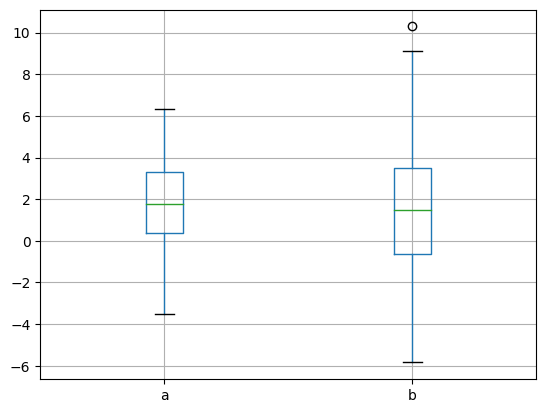

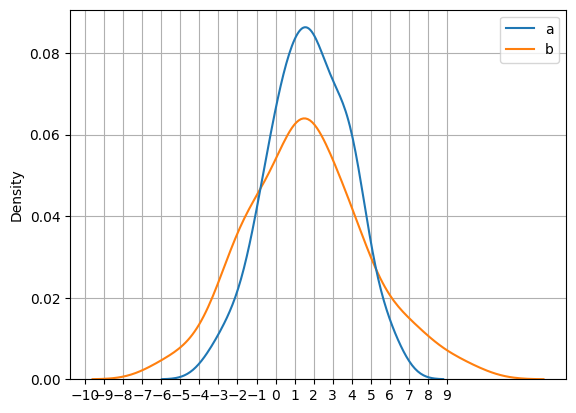

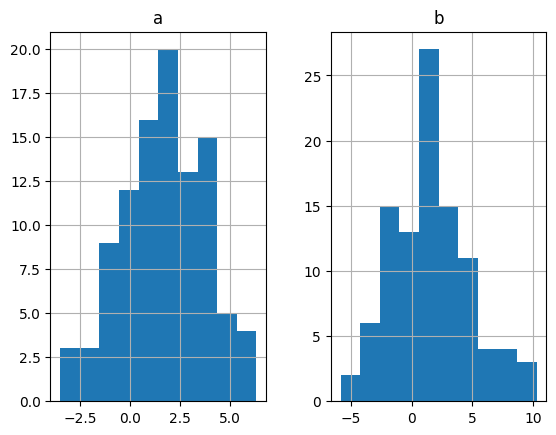

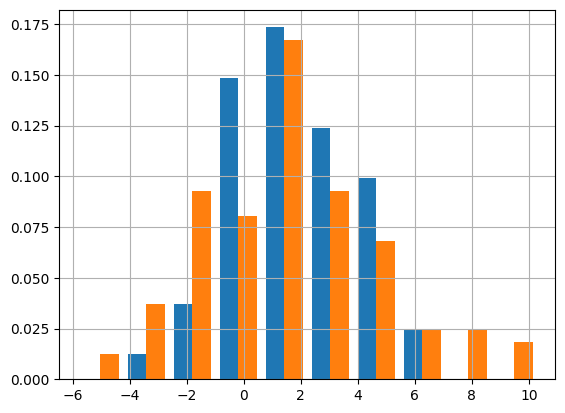

TtestResult(statistic=0.37681425298670274, pvalue=0.646610789993805, df=171.14880780811217)


In [5]:
import scipy.stats as sts
import pandas as pd
import numpy as np 

a = sts.norm(2,2)
b = sts.norm(2,3)

a = a.rvs(100)
b = b.rvs(100)

print(a.mean(), b.mean())
print(sts.shapiro(a), sts.shapiro(b))
print(sts.bartlett(a,b))

print(a.mean(), b.mean())

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({"a":a,"b":b})
df.boxplot()
plt.show()

sns.kdeplot(df)
plt.xticks(np.arange(-10,10,1))
plt.grid(True)
plt.show()

df.hist()
# plt.xticks(np.arange(-10,10,1))
plt.grid(True)
plt.show()

plt.hist(df, density=True)
# plt.xticks(np.arange(-10,10,1))
plt.grid(True)
plt.show()

ret = sts.ttest_ind(a, b, equal_var=False, alternative='less' )

print(ret)

In [ ]:
import pandas as pd 
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_1_obesity_v2.csv",index_col=0)

In [20]:
df.info()
df["CAEC"].unique()

<class 'pandas.core.frame.DataFrame'>
Index: 1262 entries, 0 to 1261
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1262 non-null   object 
 1   Gender                          1262 non-null   object 
 2   Age                             1262 non-null   int64  
 3   Height                          1262 non-null   float64
 4   Weight                          1262 non-null   int64  
 5   family_history_with_overweight  1262 non-null   object 
 6   FAVC                            1262 non-null   object 
 7   FCVC                            1262 non-null   object 
 8   NCP                             1262 non-null   int64  
 9   CAEC                            1262 non-null   object 
 10  SMOKE                           1262 non-null   object 
 11  CH2O                            1262 non-null   object 
 12  SCC                             1259 no

array(['sometimes', 'frequently', 'always', 'no'], dtype=object)

In [1]:
print(df.Gender.unique())


level = {'overweight_level_i':0,'obesity_type_i':1,'obesity_type_ii':2, 'obesity_type_iii':3 }
df["ObeyLevel"] = df["NObeyesdad"].map(level) 
df = pd.get_dummies(["Gender","family_history_with_overweight",""])


NameError: name 'df' is not defined

### 81

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    8784 non-null   object 
 1   Ïù¥ÌôîÎèôÍ∞ïÏàò   8784 non-null   float64
 2   Ïù¥ÌôîÎèôÍ∏∞Ïò®   8784 non-null   float64
 3   ÏàòÏòÅÎèôÍ∞ïÏàò   8784 non-null   float64
 4   ÏàòÏòÅÎèôÍ∏∞Ïò®   8784 non-null   float64
dtypes: float64(4), object(1)
memory usage: 343.2+ KB


c:\programming\venv_307\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\programming\venv_307\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\programming\venv_307\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\programming\venv_307\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\programming\venv_307\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\programming\venv_307\lib\sit

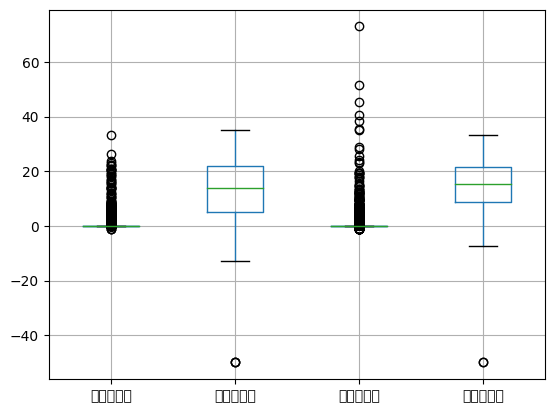

Ïù¥ÌôîÎèôÍ∞ïÏàò     Ïù¥ÌôîÎèôÍ∏∞Ïò®     ÏàòÏòÅÎèôÍ∞ïÏàò     ÏàòÏòÅÎèôÍ∏∞Ïò®
Ïù¥ÌôîÎèôÍ∞ïÏàò  1.000000  0.098939  0.175119  0.134809
Ïù¥ÌôîÎèôÍ∏∞Ïò®  0.098939  1.000000  0.071201  0.940755
ÏàòÏòÅÎèôÍ∞ïÏàò  0.175119  0.071201  1.000000  0.069818
ÏàòÏòÅÎèôÍ∏∞Ïò®  0.134809  0.940755  0.069818  1.000000

In [14]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/weather/weather2.csv")
df.head()
df.info()
# Î™®Îëê ÏàòÏπòÌòï
# 
df.boxplot()
plt.show()

# ÎèôÏùò Í∏∞Ïò®ÎÅºÎ¶¨Îäî ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÏúºÎÇò, Í∞ïÏàòÍ∞ÑÏóêÎäî ÏÉÅÍ¥ÄÏù¥ ÏóÜÏùå 
corr = df.corr()
corr

#### 81 Ïó¨Î¶ÑÏ≤†(6Ïõî,7Ïõî,8Ïõî) Ïù¥ÌôîÎèôÏù¥ ÏàòÏòÅÎèôÎ≥¥Îã§ ÎÜíÏùÄ Í∏∞Ïò®ÏùÑ Í∞ÄÏßÑ ÏãúÍ∞ÑÎåÄÎäî Î™áÍ∞úÏù∏Í∞Ä?
82. Ïù¥ÌôîÎèôÍ≥º ÏàòÏòÅÎèôÏùò ÏµúÎåÄÍ∞ïÏàòÎüâÏùò ÏãúÍ∞ÑÎåÄÎ•º Í∞ÅÍ∞Å Íµ¨ÌïòÏó¨Îùº

In [51]:
sf = (df[ df["Ïù¥ÌôîÎèôÍ∏∞Ïò®"] > df["ÏàòÏòÅÎèôÍ∏∞Ïò®"]])
sf["time"]= pd.to_datetime(sf["time"])
sf[(sf.time.dt.month >= 6) & (sf.time.dt.month <= 8)].count()




c:\programming\venv_307\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


time     2020-09-30 09:00:00
Ïù¥ÌôîÎèôÍ∞ïÏàò                   33.3
Ïù¥ÌôîÎèôÍ∏∞Ïò®                   18.8
ÏàòÏòÅÎèôÍ∞ïÏàò                      0
ÏàòÏòÅÎèôÍ∏∞Ïò®                   18.6
Name: 6561, dtype: object

In [54]:
print(df.loc[df["Ïù¥ÌôîÎèôÍ∞ïÏàò"].argmax(),["time","Ïù¥ÌôîÎèôÍ∞ïÏàò"]])
print(df.loc[df["ÏàòÏòÅÎèôÍ∞ïÏàò"].argmax(),["time","ÏàòÏòÅÎèôÍ∞ïÏàò"]])



time     2020-09-30 09:00:00
Ïù¥ÌôîÎèôÍ∞ïÏàò                   33.3
Name: 6561, dtype: object
time     2020-07-23 12:00:00
ÏàòÏòÅÎèôÍ∞ïÏàò                     73
Name: 4908, dtype: object


### 83-84, ÏÑúÎπÑÏä§Ïù¥ÌÉà Îç∞Ïù¥ÌÑ∞ , Exited
83, ÎÇ®ÏÑ± Ïù¥ÌÉà(Exited)Ïù¥ Í∞ÄÏû• ÎßéÏùÄ Íµ≠Í∞Ä(Geography)Îäî Ïñ¥ÎîîÏù¥Í≥† Ïù¥ÌÉà Ïù∏ÏõêÏùÄ Î™áÎ™ÖÏù∏Í∞Ä?

84,**Ïπ¥ÎìúÎ•º ÏÜåÏú†(HasCrCard ==1)ÌïòÍ≥† ÏûàÏúºÎ©¥ÏÑú ÌôúÏÑ±Î©§Î≤Ñ(IsActiveMember ==1) Ïù∏ Í≥†Í∞ùÎì§Ïùò ÌèâÍ∑† ÎÇòÏù¥Î•º ÏÜåÏà´Ï†êÏù¥Ìïò 4ÏûêÎ¶¨ÍπåÏßÄ Íµ¨ÌïòÏó¨Îùº? **

85, Balance Í∞íÏù¥ Ï§ëÍ∞ÑÍ∞í Ïù¥ÏÉÅÏùÑ Í∞ÄÏßÄÎäî Í≥†Í∞ùÎì§Ïùò CreditScoreÏùò ÌëúÏ§ÄÌé∏Ï∞®Î•º ÏÜåÏà´Ï†êÏù¥Ìïò 3ÏûêÎ¶¨ÍπåÏßÄ Íµ¨ÌïòÏó¨Îùº

In [69]:
import pandas as pd
#Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/churn/train.csv")
df.head()
# df.info()
print(df["Geography"].value_counts())

sf = df.drop("Surname",axis=1)
sf["Gender"] = sf["Gender"].map({"Male":1,"Female":0})
# sf["Geography"] = sf["Geography"].map({"France":0,"Germany":1, "Spain":2})

sf.info()



France     4024
Germany    1994
Spain      1981
Name: Geography, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        7999 non-null   int64  
 1   CustomerId       7999 non-null   int64  
 2   CreditScore      7999 non-null   int64  
 3   Geography        7999 non-null   object 
 4   Gender           7999 non-null   int64  
 5   Age              7999 non-null   int64  
 6   Tenure           7999 non-null   int64  
 7   Balance          7999 non-null   float64
 8   NumOfProducts    7999 non-null   int64  
 9   HasCrCard        7999 non-null   int64  
 10  IsActiveMember   7999 non-null   int64  
 11  EstimatedSalary  7999 non-null   float64
 12  Exited           7999 non-null   int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 812.5+ KB


In [122]:
s = sf.groupby(["Gender","Exited","Geography"]).size().reset_index()
print(s)
sf[(sf["Gender"] == 1) & (sf["Exited"] == 1)]["Geography"].value_counts().head(1)

age =sf.loc[(sf["HasCrCard"] == 1) & (sf["IsActiveMember"] == 1), "Age"].mean()
print(f"{round(age,4)}")

cs_std = sf.loc[ sf["Balance"] >= sf['Balance'].median(), "CreditScore"].std()
np.round(cs_std,3)

    Gender  Exited Geography     0
0        0       0    France  1417
1        0       0   Germany   586
2        0       0     Spain   681
3        0       1    France   373
4        0       1   Germany   363
5        0       1     Spain   184
6        1       0    France  1949
7        1       0   Germany   758
8        1       0     Spain   979
9        1       1    France   285
10       1       1   Germany   287
11       1       1     Spain   137
39.6102


97.295

### ÏÑ±Ïù∏ Í±¥Í∞ïÍ≤ÄÏßÑ Îç∞Ïù¥ÌÑ∞
Îç∞Ïù¥ÌÑ∞ ÏÑ§Î™Ö : 2018ÎÖÑÎèÑ ÏÑ±Ïù∏Ïùò Í±¥Í∞ïÍ≤Ä ÏßÑÎç∞Ïù¥ÌÑ∞ (Ìù°Ïó∞ÏÉÅÌÉú 1- Ìù°Ïó∞, 0-ÎπÑÌù°Ïó∞ )

86, ÏàòÏ∂ïÍ∏∞ÌòàÏïïÍ≥º Ïù¥ÏôÑÍ∏∞ ÌòàÏïïÍ∏∞ ÏàòÏπòÏùò Ï∞®Ïù¥Î•º ÏÉàÎ°úÏö¥ Ïª¨Îüº(‚ÄòÌòàÏïïÏ∞®‚Äô) ÏúºÎ°ú ÏÉùÏÑ±ÌïòÍ≥†, Ïó∞Î†πÎåÄ ÏΩîÎìúÎ≥Ñ Í∞Å Í∑∏Î£π Ï§ë ‚ÄòÌòàÏïïÏ∞®‚Äô Ïùò Î∂ÑÏÇ∞Ïù¥ 5Î≤àÏß∏Î°ú ÌÅ∞ Ïó∞Î†πÎåÄ ÏΩîÎìúÎ•º Íµ¨ÌïòÏó¨Îùº.

Question 88

Vehicle_Age Í∞íÏù¥ 2ÎÖÑ Ïù¥ÏÉÅÏù∏ ÏÇ¨ÎûåÎì§Îßå ÌïÑÌÑ∞ÎßÅ ÌïòÍ≥† Í∑∏Ï§ëÏóêÏÑú
Annual_Premium Í∞íÏù¥ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò Ï§ëÍ∞ÑÍ∞í Ïù¥ÏÉÅÏù∏ ÏÇ¨ÎûåÎì§ÏùÑ Ï∞æÍ≥†, Í∑∏Îì§Ïùò VintageÍ∞íÏùò ÌèâÍ∑†ÏùÑ Íµ¨ÌïòÏó¨Îùº

In [16]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/smoke/train.csv")
df.head()

ÏÑ±Î≥ÑÏΩîÎìú  Ïó∞Î†πÎåÄÏΩîÎìú(5ÏÑ∏Îã®ÏúÑ)  Ïã†Ïû•(5CmÎã®ÏúÑ)  Ï≤¥Ï§ë(5KgÎã®ÏúÑ)  ÌóàÎ¶¨ÎëòÎ†à  ÏãúÎ†•(Ï¢å)  ÏãúÎ†•(Ïö∞)  Ï≤≠Î†•(Ï¢å)  Ï≤≠Î†•(Ïö∞)  \
0    F           55        145         55  73.0    0.7    0.5    1.0    1.0   
1    M           40        180         55  74.0    1.5    1.5    1.0    1.0   
2    F           55        150         50  72.0    1.0    0.2    1.0    1.0   
3    M           40        170         85  89.0    1.0    0.8    1.0    1.0   
4    F           40        155         45  62.0    0.5    1.0    1.0    1.0   

   ÏàòÏ∂ïÍ∏∞ÌòàÏïï  ...   ÌòàÏÉâÏÜå  ÏöîÎã®Î∞±  ÌòàÏ≤≠ÌÅ¨Î†àÏïÑÌã∞Îãå  (ÌòàÏ≤≠ÏßÄÏò§Ìã∞)AST  (ÌòàÏ≤≠ÏßÄÏò§Ìã∞)ALT  Í∞êÎßàÏßÄÌã∞Ìîº  Ìù°Ïó∞ÏÉÅÌÉú  \
0  129.0  ...  12.9  1.0      0.9       172.0       209.0   15.0     0   
1  102.0  ...  15.6  1.0      0.8        30.0        19.0   23.0     1   
2  116.0  ...  14.1  1.0      1.0        31.0        19.0   10.0     0   
3  124.0  ...  16.7  1.0      1.0        26.0        38.0  108.0     1   
4  127.0  ...  12.9  1.0      0.7        20.0        11.0   13.0     0   

   Íµ¨Í∞ïÍ≤ÄÏßÑÏàòÍ≤ÄÏó¨Î∂Ä  ÏπòÏïÑÏö∞ÏãùÏ¶ùÏú†Î¨¥  ÏπòÏÑù  
0         Y      0.0   Y  
1         Y      0.0   Y  
2         Y      0.0   N  
3         Y      1.0   Y  
4         Y      0.0   N  

[5 rows x 26 columns]

In [51]:
# df.info()
df.isna().sum().to_frame().reset_index()
df["diff"]=df["ÏàòÏ∂ïÍ∏∞ÌòàÏïï"] - df["Ïù¥ÏôÑÍ∏∞ÌòàÏïï"]
df.groupby(["Ïó∞Î†πÎåÄÏΩîÎìú(5ÏÑ∏Îã®ÏúÑ)"]).var()["diff"].sort_values(ascending=False)

KeyError: 'ÏàòÏ∂ïÍ∏∞ÌòàÏïï'

In [28]:
df["ÏÑ±Î≥ÑÏΩîÎìú"].isin(["M"])
sf = df["ÏÑ±Î≥ÑÏΩîÎìú"].value_counts().to_frame()

Question 88

Vehicle_Age Í∞íÏù¥ 2ÎÖÑ Ïù¥ÏÉÅÏù∏ ÏÇ¨ÎûåÎì§Îßå ÌïÑÌÑ∞ÎßÅ ÌïòÍ≥† Í∑∏Ï§ëÏóêÏÑú
Annual_Premium Í∞íÏù¥ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò Ï§ëÍ∞ÑÍ∞í Ïù¥ÏÉÅÏù∏ ÏÇ¨ÎûåÎì§ÏùÑ Ï∞æÍ≥†, Í∑∏Îì§Ïùò VintageÍ∞íÏùò ÌèâÍ∑†ÏùÑ Íµ¨ÌïòÏó¨Îùº

In [31]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/insurance/train.csv")
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0  188957  Female   25                1         17.0                   1   
1  275631    Male   20                1         22.0                   0   
2  329036  Female   40                1         41.0                   0   
3  227288  Female   28                1         30.0                   1   
4  300441  Female   50                1         28.0                   0   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0    < 1 Year             No         38785.0                 152.0       59   
1    < 1 Year             No          2630.0                 160.0      113   
2    1-2 Year            Yes         33165.0                 124.0      188   
3    < 1 Year             No         29038.0                 152.0      233   
4    1-2 Year            Yes         31325.0                 124.0      258   

   Response  
0         0  
1         0  
2         0  
3         0  
4         0

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    304887 non-null  int64  
 1   Gender                304887 non-null  object 
 2   Age                   304887 non-null  int64  
 3   Driving_License       304887 non-null  int64  
 4   Region_Code           304887 non-null  float64
 5   Previously_Insured    304887 non-null  int64  
 6   Vehicle_Age           304887 non-null  object 
 7   Vehicle_Damage        304887 non-null  object 
 8   Annual_Premium        304887 non-null  float64
 9   Policy_Sales_Channel  304887 non-null  float64
 10  Vintage               304887 non-null  int64  
 11  Response              304887 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 27.9+ MB


Question 89

vehicle_ageÏóê Îî∞Î•∏ Í∞Å ÏÑ±Î≥Ñ(gender)Í∑∏Î£πÏùò Annual_PremiumÍ∞íÏùò ÌèâÍ∑†ÏùÑ Íµ¨ÌïòÏó¨ ÏïÑÎûò ÌÖåÏù¥Î∏îÍ≥º ÎèôÏùºÌïòÍ≤å Íµ¨ÌòÑÌïòÎùº

In [66]:
print(df.columns)
# df["Annual_Premium"].value_counts()
sf = df[["Vehicle_Age","Gender", "Annual_Premium"]]

ssf = sf.groupby(["Vehicle_Age","Gender"]).mean()["Annual_Premium"].to_frame()
print(ssf)
ssf.pivot_table(index="Vehicle_Age", columns="Gender", values='Annual_Premium')

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')
                    Annual_Premium
Vehicle_Age Gender                
1-2 Year    Female    30762.245001
            Male      30413.088469
< 1 Year    Female    29972.286702
            Male      30310.982212
> 2 Years   Female    36108.366374
            Male      35303.870627


Gender             Female          Male
Vehicle_Age                            
1-2 Year     30762.245001  30413.088469
< 1 Year     29972.286702  30310.982212
> 2 Years    36108.366374  35303.870627

### Ìï∏ÎìúÌè∞ Í∞ÄÍ≤© ÏòàÏ∏°Îç∞Ïù¥ÌÑ∞

In [69]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/mobile/train.csv")
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

### Ìï∏ÎìúÌè∞ Í∞ÄÍ≤© ÏòàÏ∏°Îç∞Ïù¥ÌÑ∞

In [70]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/mobile/train.csv")
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

### Question 90

price_range Ïùò Í∞Å valueÎ•º Í∑∏Î£πÌïëÌïòÏó¨ Í∞Å Í∑∏Î£πÏùò n_cores Ïùò ÎπàÎèÑÍ∞Ä Í∞ÄÏû•ÎÜíÏùÄ valueÏôÄ Í∑∏ ÎπàÎèÑÏàòÎ•º Íµ¨ÌïòÏó¨Îùº`

In [118]:
df.isna().sum()

sf =df.groupby(["price_range"]).value_counts(["n_cores"]).groupby(level=0).head(1)
# sf =df.groupby(["price_range"]).value_counts(["n_cores"]).to_frame().groupby(level=0).head(1)
sf
# answer =df[['price_range','n_cores']].groupby(['price_range','n_cores']).size().sort_values(0).groupby(level=0).tail(1)
# answer


price_range  n_cores
0            2          69
1            4          76
2            4          73
3            5          70
Name: count, dtype: int64

### <span style="color:red">  Question 91</span>

price_range Í∞íÏù¥ 3Ïù∏ Í∑∏Î£πÏóêÏÑú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä 2Î≤àÏß∏Î°ú ÎÜíÏùÄ Îëê Ïª¨ÎüºÍ≥º Í∑∏ ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Íµ¨ÌïòÏó¨Îùº

df.corr()ÏùÄ dataframeÏù¥Î©∞, Ïù¥Î•º unstackÌïòÎ©¥ seriesÎ°ú Î∞îÎÄú. 

In [195]:
corr = df.loc[df['price_range']==3].corr()
sf = df.loc[df['price_range']==3].corr().unstack().sort_values(ascending=False)

t = sf[sf != 1].reset_index().iloc[1]
print(t)
# s.index, s.values
# # corr = df.corr()
# s = corr["price_range"].sort_values(ascending=False)

# cordf = df.loc[df['price_range']==3].corr().unstack().sort_values(ascending=False)
# cordf

level_0          pc
level_1          fc
0          0.635166
Name: 1, dtype: object


### Question 92
ÎπÑÌñâÌÉëÏäπ Í≤ΩÌóò ÎßåÏ°±ÎèÑ Îç∞Ïù¥ÌÑ∞

Îç∞Ïù¥ÌÑ∞ ÏÑ§Î™Ö : ÎπÑÌñâÌÉëÏäπ Í≤ΩÌóò ÎßåÏ°±ÎèÑ (satisfaction Ïª¨Îüº : ‚Äòneutral or dissatisfied‚Äô or satisfied )

In [199]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/train.csv")
df.head()
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83123 entries, 0 to 83122
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 83123 non-null  int64  
 1   Gender                             83123 non-null  object 
 2   Customer Type                      83123 non-null  object 
 3   Age                                83123 non-null  int64  
 4   Type of Travel                     83123 non-null  object 
 5   Class                              83123 non-null  object 
 6   Flight Distance                    83123 non-null  int64  
 7   Inflight wifi service              83123 non-null  int64  
 8   Departure/Arrival time convenient  83123 non-null  int64  
 9   Ease of Online booking             83123 non-null  int64  
 10  Gate location                      83123 non-null  int64  
 11  Food and drink                     83123 non-null  int

In [202]:
df["satisfaction"].value_counts()

satisfaction
neutral or dissatisfied    47103
satisfied                  36020
Name: count, dtype: int64

### Question 92

Arrival Delay in Minutes Ïª¨ÎüºÏù¥ Í≤∞Ï∏°ÏπòÏù∏ Îç∞Ïù¥ÌÑ∞Îì§ Ï§ë ‚Äòneutral or dissatisfied‚Äô Î≥¥Îã§ ‚Äòsatisfied‚ÄôÏùò ÏàòÍ∞Ä Îçî ÎÜíÏùÄ ClassÎäî Ïñ¥Îîî Ïù∏Í∞Ä?

In [212]:
df.isna().sum()
sf = df[df["Arrival Delay in Minutes"].isna()]
ssf = sf.groupby(["Class","satisfaction"]).size().unstack()
ssf[ssf["neutral or dissatisfied"] < ssf["satisfied"]]

satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                           36         76

### ÏàòÏßà ÏùåÏö©ÏÑ± Ïó¨Î∂Ä Îç∞Ïù¥ÌÑ∞
Îç∞Ïù¥ÌÑ∞ ÏÑ§Î™Ö : ÏàòÏßà ÏùåÏö©ÏÑ± Ïó¨Î∂Ä (Potablillity Ïª¨Îüº : 0 ,1 )


In [50]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/waters/train.csv")
df.head()
# df.to_csv()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.918150  214.186611  23823.492888     7.290878  341.173322    411.424483   
1  5.422446  205.266080  18542.957451     5.491963  306.702227    382.080129   
2  7.341547  187.672402  21273.457066     7.784003         NaN    332.084293   
3  9.056245  197.666301  17403.532167     7.688917  337.460176    414.766631   
4  5.039374  142.860598  40829.353167     7.271543         NaN    386.803057   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       19.585002        25.057375   4.028958           0  
1       10.504023        67.493450   2.911751           1  
2       16.842334        55.019151   4.025644           0  
3       15.349869        63.696746   3.319354           0  
4       16.823773        52.297113   4.957420           0

In [3]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/muscle/train.csv")
df.head()

motion_0  motion_1  motion_2  motion_3  motion_4  motion_5  motion_6  \
0      -6.0       8.0       5.0       6.0     -12.0     -27.0       5.0   
1     -32.0      -3.0      -4.0      -5.0      -1.0      16.0       0.0   
2      35.0      -2.0      -1.0       1.0     -25.0     -16.0      -3.0   
3     -15.0      -6.0      -3.0      -5.0      27.0      37.0      -2.0   
4      60.0       3.0       0.0      -7.0      -6.0     -10.0      -6.0   

   motion_7  motion_8  motion_9  ...  motion_55  motion_56  motion_57  \
0      24.0      -8.0      -5.0  ...       -1.0       -3.0       -6.0   
1      -5.0      42.0       2.0  ...      -17.0      -12.0       -1.0   
2     -20.0      10.0       1.0  ...        6.0      -65.0        6.0   
3      -2.0      19.0       5.0  ...        2.0       11.0        0.0   
4       7.0     -11.0      -4.0  ...      -12.0       17.0       -3.0   

   motion_58  motion_59  motion_60  motion_61  motion_62  motion_63  pose  
0       -9.0       -7.0       36.0       68.0        3.0       -3.0     1  
1       -1.0        0.0      -26.0      -11.0       -4.0       -9.0     1  
2      -10.0      -31.0      -19.0       -3.0      -47.0      -17.0     0  
3       -2.0       -4.0       -7.0       15.0        3.0       14.0     1  
4        1.0        2.0       -2.0       20.0       18.0       10.0     0  

[5 rows x 65 columns]

In [49]:
t = df.groupby("pose").median()
t = t.T
t["diff"] = abs(t[0] - t[1])
s = t["diff"].sort_values(ascending=False)
type(s)
maxs = s[s == s.max()]
maxs

# dir(t)

KeyError: 'pose'

In [83]:
df.dtypes  == 'int'
# df.dtypesÎäî pd.Series ÏûÑ.. 

motion_0     False
motion_1     False
motion_2     False
motion_3     False
motion_4     False
             ...  
motion_60    False
motion_61    False
motion_62    False
motion_63    False
pose         False
Length: 65, dtype: bool

In [95]:
n = np.arange(100)
s = pd.Series(n)

import scipy.stats as sts

sts.ttest_1samp(n, 50)


Ttest_1sampResult(statistic=-0.17234549688642783, pvalue=0.8635177536861673)

In [3]:
pd.set_option('display.max_columns',50)
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/nba/nba.csv",encoding='latin',sep=';')
df.head()

round(df[df["Tm"] == "TOR"]["Age"].mean(),4)

24.8696

In [51]:
df.groupby(["Tm"]).mean()["Age"]
t = df.groupby(["Age","Pos"]).size().to_frame().reset_index().sort_values(["Age","Pos",0], ascending=True).head()
age  = df["Age"].min()
t.loc[t["Age"] == age].sort_values(0, ascending=False).head(1)["Pos"]

3    SG
Name: Pos, dtype: object

In [61]:
df["firstName"] = df.Player.str.split(' ').str[0]
df["firstName"].value_counts().head(1)



Justin    14
Name: firstName, dtype: int64

In [2]:
t = df.groupby(["Pos"])["PTS"].mean().sort_values()
t.name = 'sss'
t

NameError: name 'df' is not defined

In [9]:
df.groupby(["Pos"])["PTS"].mean().sort_values(ascending=False)

Pos
PG-SG    22.000000
C-PF     12.850000
SG-PG     9.525000
SF-SG     8.660000
PF-SF     8.500000
PG        8.325161
SG        7.810553
PF        7.737500
C         7.690769
SG-SF     7.360000
SF        7.270253
Name: PTS, dtype: float64

## <span style="color:red">109- GÏª¨ÎüºÏùÄ Ï∞∏Ïó¨Ìïú Í≤ΩÍ∏∞Ïùò Ïà´ÏûêÏù¥Îã§. Í∞Å ÌåÄÎ≥ÑÎ°ú Í∞ÄÏû• ÎÜíÏùÄ Í≤ΩÍ∏∞Ï∞∏Ïó¨ ÏàòÎ•º Í∞ÄÏßÑ ÏÑ†ÏàòÎì§Ïùò Í≤ΩÍ∏∞ Ï∞∏Ïó¨ Ïà´ÏûêÏùò ÌèâÍ∑†ÏùÑ Íµ¨ÌïòÏó¨Îùº </span>

In [23]:
df.sort_values(["Tm","G"], ascending=False).groupby(["Tm"]).head(1)["G"].mean()


77.51612903225806

In [32]:
sf = df.sort_values(["Tm","G"], ascending=False).groupby(["Tm"]).head
print(sf["G"].mean())


70.89032258064516


TmÏùò Í∞íÏù¥ MIAÏù¥Î©∞ PosÎäî CÎòêÎäî PFÏù∏ ÏÑ†ÏàòÏùò MPÍ∞íÏùò ÌèâÍ∑†ÏùÄ?

In [35]:
df[(df["Tm"] == 'MIA') & ( (df["Pos"] == 'C') | (df["Pos"] == 'PF'))]["MP"].mean() 

16.7875

Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ï§ë GÏùò ÌèâÍ∑†Í∞íÏùò 1.5Î∞∞ Ïù¥ÏÉÅÏù∏ Îç∞Ïù¥ÌÑ∞Îì§Îßå Ï∂îÏ∂úÌñàÏùÑÎïå 3PÍ∞íÏùò ÌèâÍ∑†ÏùÄ?

In [38]:
avg = df["G"].mean()

df[df["G"] > 1.5*avg]["3P"].mean()

1.3853658536585365

AgeÏùò ÌèâÍ∑† Ïù¥ÏÉÅÏù∏ Í∑∏Î£πÍ≥º ÌèâÍ∑† ÎØ∏ÎßåÏù∏ Í∑∏Î£πÍ∞ÑÏùò GÍ∞íÏùò ÌèâÍ∑†Ïùò Ï∞®Ïù¥Îäî?

In [39]:
avg = df["Age"].mean()
a = df[df["Age"] >= avg]["G"].mean()
b = df[df["Age"] < avg]["G"].mean()
a - b

3.787674551781862

ÌèâÍ∑†ÎÇòÏù¥Í∞Ä Í∞ÄÏû• Ï†äÏùÄ ÌåÄÏùÄ Ïñ¥ÎîîÏù∏Í∞Ä

In [46]:
df.groupby(["Tm"]).mean()["Age"].sort_values().head(1)

Tm
MEM    23.782609
Name: Age, dtype: float64

PosÍ∑∏Î£πÎ≥Ñ ÌèâÍ∑† MPÍ∞íÏùÑ Íµ¨ÌïòÏó¨Îùº

In [48]:
df.groupby(["Pos"]).mean()["MP"].sort_values()

Pos
C        16.990000
SF       17.514557
PF       17.937500
SG       18.554271
PG       19.547742
SG-SF    19.620000
SF-SG    20.340000
SG-PG    22.950000
C-PF     25.350000
PF-SF    27.300000
PG-SG    37.200000
Name: MP, dtype: float64